In [13]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

proxies = {'http':''}

recon_time = 130

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/reconstructions/plate_boundaries/?time=%0.2f' % recon_time,
                 proxies=proxies)
tpb = json.loads(r.text)

print tpb


{u'type': u'FeatureCollection', u'features': [{u'geometry': {u'type': u'Polyline', u'feature_type': u'gpml:SubductionZone', u'coordinates': [[[-33.88, -31.03], [-33.79, -30.34], [-33.7, -29.65], [-33.61, -28.95], [-33.74, -28.47], [-33.79, -27.9], [-33.84, -27.33], [-34.03, -26.61], [-34.41, -26.11], [-34.79, -25.6], [-35.36, -25.06], [-35.93, -24.52], [-36.49, -23.98], [-37.13, -23.71]]]}, u'type': u'Feature'}, {u'geometry': {u'type': u'Polyline', u'feature_type': u'gpml:SubductionZone', u'coordinates': [[[-37.13, -23.71], [-37.38, -23.6], [-38.01, -23.0], [-38.63, -22.39], [-39.24, -21.78], [-39.85, -21.17], [-40.46, -20.56], [-40.93, -19.78], [-41.4, -19.01], [-41.87, -18.23], [-42.34, -17.45], [-42.79, -16.67], [-43.25, -15.89], [-43.58, -15.01], [-43.9, -14.13], [-44.22, -13.25], [-44.54, -12.36], [-44.37, -11.41], [-44.21, -10.46], [-44.05, -9.51], [-44.01, -9.23], [-43.98, -8.98], [-43.93, -8.7], [-43.86, -8.32], [-43.82, -8.11], [-43.79, -7.87], [-43.66, -7.48], [-43.55, -7.14]

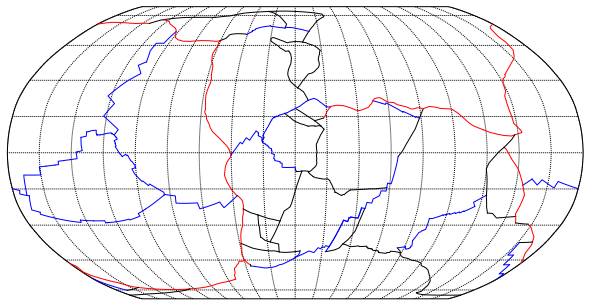

In [15]:
fig = plt.figure(figsize=(10,5))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='robin',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))

for feature in tpb['features']:
    #print feature['geometry']
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    if feature['geometry']['feature_type']=='gpml:SubductionZone':
        m.plot(x,y,'r')
    elif feature['geometry']['feature_type']=='gpml:MidOceanRidge':
        m.plot(x,y,'b')
    else:
        m.plot(x,y,'k')
    
plt.show()

  
    